In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [174]:
# Load historical and new datasets
historical_data = pd.read_csv('/content/historical.csv')
new_data = pd.read_csv('/content/new_data.csv')

In [175]:
# View the first few rows of data to understand the structure
print("Historical Dataset:")
print(historical_data.head())
print("\nNew Data Set:")
print(new_data.head())

Historical Dataset:
   Length of Username  Country Block_1  Country Block_2  Number of Followers  \
0            0.571614                0                0             0.342118   
1            0.402271                0                0             0.373213   
2            0.485398                0                0             0.411632   
3            0.465359                0                0             0.432781   
4            0.442205                0                0             0.392622   

   Number of Posts  Number of Mutual Followers  Percentage of Following  \
0         0.616871                    0.418857                 0.758517   
1         0.574701                    0.546779                 0.749582   
2         0.657100                    0.529637                 0.793919   
3         0.573072                    0.352555                 0.823565   
4         0.649628                    0.425873                 0.866499   

   Is Business Account  Class  Sex  Is Joined Re

In [176]:
print("information Dataset:")
print(historical_data.info())
print("\ndescribe Dataset:")
print(historical_data.describe())
print("\nisnul Dtaset:")
print(historical_data.isnull().sum())


information Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length of Username          2000 non-null   float64
 1   Country Block_1             2000 non-null   int64  
 2   Country Block_2             2000 non-null   int64  
 3   Number of Followers         2000 non-null   float64
 4   Number of Posts             2000 non-null   float64
 5   Number of Mutual Followers  2000 non-null   float64
 6   Percentage of Following     2000 non-null   float64
 7   Is Business Account         2000 non-null   int64  
 8   Class                       2000 non-null   int64  
 9   Sex                         2000 non-null   int64  
 10  Is Joined Recently          2000 non-null   int64  
 11  Is Verified                 2000 non-null   int64  
 12  Is Private                  2000 non-null   int64  
 13  Is Professio

In [177]:
print("informatio New Dataset")
print(new_data.info())
print("\nDescribe New Dataset")
print(new_data.describe())
print("\nIsnull Dataset")
print(new_data.isnull().sum())

informatio New Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length of Username          2000 non-null   float64
 1   Country Block_1             2000 non-null   int64  
 2   Country Block_2             2000 non-null   int64  
 3   Number of Followers         2000 non-null   float64
 4   Number of Posts             2000 non-null   float64
 5   Number of Mutual Followers  2000 non-null   float64
 6   Percentage of Following     2000 non-null   float64
 7   Is Business Account         2000 non-null   int64  
 8   Sex                         2000 non-null   int64  
 9   Is Joined Recently          2000 non-null   int64  
 10  Is Verified                 2000 non-null   int64  
 11  Is Private                  2000 non-null   int64  
 12  Is Professional Account     2000 non-null   int64  
 13  Length of 

In [178]:
# Handle missing data (if any)
historical_data = historical_data.dropna()
new_data = new_data.dropna()


## **Exercício 1**
1) Assumindo que temos um modelo treinado e a executar num servidor na Google Cloud Platform já há algum tempo, é necessário perceber se existe algum “drift” dos dados recolhidos atualmente sobre os dados usados para treino. O principal problema é que não existem dados recentes classificados (não existe “ground truth”) para comparação, por isso apenas nos podemos guiar pelos dados recentes de entrada do modelo. Visto querermos saber se uma variável específica sofreu algum “drift”, ´´e aconselhada a utilização de técnicas mono-variável. Baseados nos dados fornecidos (historical.csv + new_data.csv), pf indique se existe algum “drift”, e se sim, indique quais as variáveis que sofreram esse “drift” e explique o porquê de as ter considerado?

In [179]:

# Carregar os dados
historical = pd.read_csv('historical.csv')
new_data = pd.read_csv('new_data.csv')

# Definir as variáveis categóricas e contínuas
categorical_columns = [
    'Country Block_1', 'Country Block_2', 'Is Business Account', 'Class',
    'Sex', 'Is Joined Recently', 'Is Verified', 'Is Private', 'Is Professional Account'
]

continuous_columns = [
    'Length of Username', 'Number of Followers', 'Number of Posts', 'Number of Mutual Followers',
    'Percentage of Following', 'Length of Biography', 'Number of Video Posts', 'Mean Post Likes'
]

# Função para teste qui-quadrado
def chi2_test(col1, col2):
    contingency_table = pd.crosstab(col1, col2)
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    return chi2_stat, p_val

# Testar "drift" para variáveis categóricas
results_categorical = {}
for column in categorical_columns:
    if column in historical.columns and column in new_data.columns:
        chi2_stat, p_value = chi2_test(historical[column], new_data[column])
        results_categorical[column] = (chi2_stat, p_value)
    else:
        print(f"A coluna '{column}' não está presente em ambos os DataFrames.")

# Testar "drift" para variáveis contínuas
results_continuous = {}
for column in continuous_columns:
    if column in historical.columns and column in new_data.columns:
        ks_statistic, p_value = ks_2samp(historical[column], new_data[column])
        results_continuous[column] = (ks_statistic, p_value)
    else:
        print(f"A coluna '{column}' não está presente em ambos os DataFrames.")

# Exibir os resultados
alpha = 0.05  # Nível de significância

print("Resultados para variáveis categóricas:")
for column, (chi2_stat, p_value) in results_categorical.items():
    print(f"Variável: {column}")
    print(f"  Chi2 Statistic: {chi2_stat}")
    print(f"  P-value: {p_value}")
    if p_value < alpha:
        print(f"  '{column}' sofreu 'drift' (Rejeitamos a hipótese nula).")
    else:
        print(f"  '{column}' não sofreu 'drift' (Não rejeitamos a hipótese nula).")

print("\nResultados para variáveis contínuas:")
for column, (ks_statistic, p_value) in results_continuous.items():
    print(f"Variável: {column}")
    print(f"  KS Statistic: {ks_statistic}")
    print(f"  P-value: {p_value}")
    if p_value < alpha:
        print(f"  '{column}' sofreu 'drift' (Rejeitamos a hipótese nula).")
    else:
        print(f"  '{column}' não sofreu 'drift' (Não rejeitamos a hipótese nula).")


A coluna 'Class' não está presente em ambos os DataFrames.
Resultados para variáveis categóricas:
Variável: Country Block_1
  Chi2 Statistic: 0.0
  P-value: 1.0
  'Country Block_1' não sofreu 'drift' (Não rejeitamos a hipótese nula).
Variável: Country Block_2
  Chi2 Statistic: 0.0
  P-value: 1.0
  'Country Block_2' não sofreu 'drift' (Não rejeitamos a hipótese nula).
Variável: Is Business Account
  Chi2 Statistic: 0.8400506128329053
  P-value: 0.35938229592792836
  'Is Business Account' não sofreu 'drift' (Não rejeitamos a hipótese nula).
Variável: Sex
  Chi2 Statistic: 97.88909536300994
  P-value: 4.424837314444276e-23
  'Sex' sofreu 'drift' (Rejeitamos a hipótese nula).
Variável: Is Joined Recently
  Chi2 Statistic: 103.31258736008779
  P-value: 2.8622899277070715e-24
  'Is Joined Recently' sofreu 'drift' (Rejeitamos a hipótese nula).
Variável: Is Verified
  Chi2 Statistic: 0.3756077120484517
  P-value: 0.5399633395583752
  'Is Verified' não sofreu 'drift' (Não rejeitamos a hipótese 

Observações e conclusões:

Variáveis que Sofreram "Drift":
### **Variáveis Categóricas:**

**Sex:** Valor p extremamente baixo (4.42e-23), indicando mudança significativa na distribuição de sexo.

**Is Joined Recently:** Valor p extremamente baixo (2.86e-24), indicando mudança significativa na distribuição de contas recentes.

**Is Private:** Valor p baixo (7.38e-05), indicando mudança significativa na distribuição de contas privadas.

### **Variáveis Contínuas:**

**Length of Username:** Valor p muito baixo (1.45e-45), indicando mudança significativa na distribuição do comprimento do nome de usuário.

**Number of Followers:** Valor p igual a 0, indicando mudança significativa na distribuição do número de seguidores.

**Number of Posts:** Valor p igual a 0, indicando mudança significativa na distribuição do número de postagens.

**Number of Mutual Followers:** Valor p igual a 0, indicando mudança significativa na distribuição do número de seguidores mútuos.

**Percentage of Following:** Valor p igual a 0, indicando mudança significativa na distribuição da porcentagem de seguidores.

Neste contexto:

**Sim, existe "drift" nos dados recentes em comparação com os dados históricos usados para treinamento do modelo.**

## **Exercício 2:**

2) Imaginando que algumas das variáveis sofreram um “drift”, queremos saber se o impacto desse “drift” é realmente significativo para justificar o retreino do modelo existente. Visto que os “drifts” de algumas variáveis são menores do que outros, considere agora uma análise multi-variável. Para isso, pf indique que abordagem utilizou e explique se o “drift” é significativo o suficiente que justifique o retreino do modelo.


In [180]:
# Adicionar coluna de origem dos dados
historical_data['origin'] = 0  # Histórico
new_data['origin'] = 1    # Recente

# Combinar os datasets
combined_data = pd.concat([historical, new_data])
combined_data

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Class,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes,origin
0,0.571614,0,0,0.342118,0.616871,0.418857,0.758517,0,0.0,0,1,1,0,0,-36.377874,21.351665,3.991709,NaN
1,0.402271,0,0,0.373213,0.574701,0.546779,0.749582,0,1.0,1,1,0,0,0,88.449750,-37.426948,-46.275876,NaN
2,0.485398,0,0,0.411632,0.657100,0.529637,0.793919,1,1.0,1,1,0,1,0,-21.730988,24.394874,82.679909,NaN
3,0.465359,0,0,0.432781,0.573072,0.352555,0.823565,1,1.0,1,1,0,0,0,0.127095,4.760497,-96.334204,NaN
4,0.442205,0,0,0.392622,0.649628,0.425873,0.866499,0,1.0,1,1,0,1,0,103.078832,12.348019,61.515670,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.377264,0,1,0.529703,0.434352,0.731370,0.488449,0,NaN,0,0,1,0,0,144.062943,-0.573031,61.750654,1.0
1996,0.776011,0,0,0.494009,0.253048,0.579808,0.566419,0,NaN,0,0,0,1,1,2.270190,80.620323,44.360778,1.0
1997,0.804429,1,0,0.485760,0.316240,0.668239,0.466993,1,NaN,0,0,1,0,0,73.928716,123.583250,233.593984,1.0
1998,0.540649,0,0,0.523493,0.227060,0.829555,0.540849,1,NaN,0,0,1,0,0,2.003785,-3.267289,67.791737,1.0


In [181]:
# Identificar valores faltantes
missing_values = combined_data.isnull().sum()
print(missing_values[missing_values > 0])

Class     2000
origin    2000
dtype: int64


In [182]:
# Adicionar coluna de origem dos dados
historical['origin'] = 0  # Histórico
new_data['origin'] = 1    # Recente

# Combinar os datasets novamente
combined_data = pd.concat([historical, new_data])

# Verificar se ainda há valores faltantes
missing_values_combined = combined_data.isnull().sum()
print(missing_values_combined[missing_values_combined > 0])


Class    2000
dtype: int64


In [183]:
import pandas as pd

# Carregar os dados históricos e recentes
historical = pd.read_csv('historical.csv')
new_data = pd.read_csv('new_data.csv')

# Adicionar coluna de origem dos dados
historical['origin'] = 0  # Histórico
new_data['origin'] = 1    # Recente

# Combinar os datasets novamente
combined_data = pd.concat([historical, new_data])

# Verificar se há valores faltantes na coluna "Class"
missing_values_class = combined_data['Class'].isnull().sum()
print("Valores faltantes na coluna 'Class':", missing_values_class)

# Preencher valores faltantes na coluna "Class" com a moda
combined_data['Class'] = combined_data['Class'].fillna(combined_data['Class'].mode()[0])

# Verificar novamente se há valores faltantes na coluna "Class" após o preenchimento
missing_values_class_filled = combined_data['Class'].isnull().sum()
print("Valores faltantes na coluna 'Class' após o preenchimento:", missing_values_class_filled)


Valores faltantes na coluna 'Class': 2000
Valores faltantes na coluna 'Class' após o preenchimento: 0


In [184]:
combined_data

,Length of Username,Country Block_1,Country Block_2,Number of Followers,Number of Posts,Number of Mutual Followers,Percentage of Following,Is Business Account,Class,Sex,Is Joined Recently,Is Verified,Is Private,Is Professional Account,Length of Biography,Number of Video Posts,Mean Post Likes,origin
0,0.571614,0,0,0.342118,0.616871,0.418857,0.758517,0,0.0,0,1,1,0,0,-36.377874,21.351665,3.991709,0
1,0.402271,0,0,0.373213,0.574701,0.546779,0.749582,0,1.0,1,1,0,0,0,88.449750,-37.426948,-46.275876,0
2,0.485398,0,0,0.411632,0.657100,0.529637,0.793919,1,1.0,1,1,0,1,0,-21.730988,24.394874,82.679909,0
3,0.465359,0,0,0.432781,0.573072,0.352555,0.823565,1,1.0,1,1,0,0,0,0.127095,4.760497,-96.334204,0
4,0.442205,0,0,0.392622,0.649628,0.425873,0.866499,0,1.0,1,1,0,1,0,103.078832,12.348019,61.515670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.377264,0,1,0.529703,0.434352,0.731370,0.488449,0,1.0,0,0,1,0,0,144.062943,-0.573031,61.750654,1
1996,0.776011,0,0,0.494009,0.253048,0.579808,0.566419,0,1.0,0,0,0,1,1,2.270190,80.620323,44.360778,1
1997,0.804429,1,0,0.485760,0.316240,0.668239,0.466993,1,1.0,0,0,1,0,0,73.928716,123.583250,233.593984,1
1998,0.540649,0,0,0.523493,0.227060,0.829555,0.540849,1,1.0,0,0,1,0,0,2.003785,-3.267289,67.791737,1


In [185]:
# Calcular estatísticas descritivas para o combined_data
combined_stats = combined_data.describe()

# Comparar as estatísticas descritivas entre os dois conjuntos de dados
drift_variables = []
for column in combined_data.columns:
    if column not in historical.columns or column not in new_data.columns:
        continue  # A coluna não está presente em ambos os conjuntos de dados
    if historical_stats[column].equals(new_data_stats[column]):
        continue  # As estatísticas são iguais, não há "drift" nesta variável
    drift_variables.append(column)

print("Variáveis que podem ter sofrido 'drift':", drift_variables)


Variáveis que podem ter sofrido 'drift': ['Length of Username', 'Country Block_1', 'Country Block_2', 'Number of Followers', 'Number of Posts', 'Number of Mutual Followers', 'Percentage of Following', 'Is Business Account', 'Sex', 'Is Joined Recently', 'Is Verified', 'Is Private', 'Is Professional Account', 'Length of Biography', 'Number of Video Posts', 'Mean Post Likes', 'origin']


In [186]:
# valiação do impacto do "drift" em diferentes variáveis

from scipy.stats import ks_2samp, chi2_contingency

# Definir funções para testar "drift" em variáveis contínuas e categóricas
def test_continuous_drift(data1, data2):
    statistic, p_value = ks_2samp(data1, data2)
    return p_value

def test_categorical_drift(data1, data2):
    _, p_value, _, _ = chi2_contingency(pd.crosstab(data1, data2))
    return p_value

In [187]:
# Realizar testes de "drift" para cada variável identificada
for variable in drift_variables:
    if historical[variable].dtype == 'object':
        p_value = test_categorical_drift(historical[variable], new_data[variable])
    else:
        p_value = test_continuous_drift(historical[variable], new_data[variable])

    print(f"Variável: {variable}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Há indícios de 'drift' nesta variável.")
    else:
        print("Não há indícios de 'drift' nesta variável.")

Variável: Length of Username
P-value: 1.453655418056506e-45
Há indícios de 'drift' nesta variável.
Variável: Country Block_1
P-value: 0.0037704349657562016
Há indícios de 'drift' nesta variável.
Variável: Country Block_2
P-value: 0.11135887905231429
Não há indícios de 'drift' nesta variável.
Variável: Number of Followers
P-value: 0.0
Há indícios de 'drift' nesta variável.
Variável: Number of Posts
P-value: 0.0
Há indícios de 'drift' nesta variável.
Variável: Number of Mutual Followers
P-value: 0.0
Há indícios de 'drift' nesta variável.
Variável: Percentage of Following
P-value: 0.0
Há indícios de 'drift' nesta variável.
Variável: Is Business Account
P-value: 2.1848880805291417e-09
Há indícios de 'drift' nesta variável.
Variável: Sex
P-value: 5.774494239742336e-32
Há indícios de 'drift' nesta variável.
Variável: Is Joined Recently
P-value: 0.000219534246504725
Há indícios de 'drift' nesta variável.
Variável: Is Verified
P-value: 2.7541086361857144e-236
Há indícios de 'drift' nesta variá

In [188]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Suponha que você tenha X_train e y_train

# 1. Identificar amostras com valores ausentes em X_train
nan_indices = X_train[X_train.isnull().any(axis=1)].index

nan_indices

Index([], dtype='int64')

In [189]:
# Verificar se y_train tem valores ausentes
print("Valores ausentes em y_train:", y_train.isnull().sum())



Valores ausentes em y_train: 0


In [190]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = combined_data.drop(columns=['origin'])
y = combined_data['origin']

# Remover amostras com valores ausentes
combined_data_clean = combined_data.dropna(subset=['origin'])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(combined_data_clean.drop('origin', axis=1),
                                                    combined_data_clean['origin'],
                                                    test_size=0.2,
                                                    random_state=42)

# Agora você pode prosseguir com a construção do modelo e a avaliação do desempenho


In [191]:
# Treinar o modelo
classifier.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred_test = classifier.predict(X_test)

# Fazer previsões nos dados históricos
y_pred_train = classifier.predict(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [192]:
# Fazer previsões nos dados de teste
y_pred_test = classifier.predict(X_test)

# Fazer previsões nos dados históricos
y_pred_train = classifier.predict(X_train)

# Avaliar o desempenho do classificador nos dados de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_roc_test = roc_auc_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

In [193]:
# Avaliar o desempenho do classificador nos dados históricos
accuracy_train = accuracy_score(y_train, y_pred_train)
auc_roc_train = roc_auc_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)

print("Métricas de desempenho nos dados de teste:")
print("Acurácia:", accuracy_test)
print("AUC-ROC:", auc_roc_test)
print("Precisão:", precision_test)
print("Recall:", recall_test)
print("\nMétricas de desempenho nos dados históricos:")
print("Acurácia:", accuracy_train)
print("AUC-ROC:", auc_roc_train)
print("Precisão:", precision_train)
print("Recall:", recall_train)

Métricas de desempenho nos dados de teste:
Acurácia: 0.99375
AUC-ROC: 0.9937999949848291
Precisão: 0.9920844327176781
Recall: 0.9947089947089947

Métricas de desempenho nos dados históricos:
Acurácia: 0.9953125
AUC-ROC: 0.9953331020396042
Precisão: 0.9969078540507111
Recall: 0.9938347718865598


Os resultados das métricas de desempenho nos dados de teste e nos dados históricos são bastante altos, o que indica que o modelo está funcionando muito bem em ambos os conjuntos de dados.

*   A acurácia nos dados de teste e nos dados históricos é superior a 99%, o que significa que o modelo está classificando corretamente a grande maioria das amostras em ambos os conjuntos de dados.
*   A AUC-ROC (área sob a curva ROC) também é muito alta em ambos os conjuntos de dados, indicando um bom desempenho do modelo na classificação binária.
A precisão nos dados históricos é um pouco maior do que

*   A precisão nos dados de teste, sugere que o modelo está fazendo previsões um pouco mais precisas nos dados históricos. indicando que o modelo está ligeiramente sobreajustado aos dados históricos.
*   O recall é muito alto em ambos os conjuntos de dados, o que deixa claro que o modelo está identificando a grande maioria das amostras positivas.

Em resumo, os resultados sugerem que o modelo de regressão logística está funcionando bem e não parece haver um "drift" significativo entre os dados históricos e os dados de teste. No entanto, é sempre importante monitorar o desempenho do modelo ao longo do tempo e estar atento a quaisquer mudanças nos dados que possam afetar sua eficácia.

In [194]:
# Métricas de desempenho nos dados de teste
accuracy_test = 0.99375
auc_roc_test = 0.9937999949848291
precision_test = 0.9920844327176781
recall_test = 0.9947089947089947

# Métricas de desempenho nos dados históricos
accuracy_historical = 0.9953125
auc_roc_historical = 0.9953331020396042
precision_historical = 0.9969078540507111
recall_historical = 0.9938347718865598

# Comparar as métricas de desempenho
accuracy_difference = accuracy_test - accuracy_historical
auc_roc_difference = auc_roc_test - auc_roc_historical
precision_difference = precision_test - precision_historical
recall_difference = recall_test - recall_historical

# Exibir as diferenças
print("Diferença de acurácia:", accuracy_difference)
print("Diferença de AUC-ROC:", auc_roc_difference)
print("Diferença de precisão:", precision_difference)
print("Diferença de recall:", recall_difference)


Diferença de acurácia: -0.0015625000000000222
Diferença de AUC-ROC: -0.0015331070547751624
Diferença de precisão: -0.00482342133303304
Diferença de recall: 0.000874222822434878


## **Conclusão:**
 Observa-se pequenas diferenças nas métricas de desempenho entre os dados históricos e recentes. Embora algumas métricas possam ter diminuído ligeiramente nos dados recentes, essas diferenças são relativamente pequenas. Portanto, o impacto do "drift" pode não ser significativo o suficiente para justificar imediatamente o retreino completo do modelo existente. No entanto, é importante monitorar continuamente o desempenho do modelo e considerar ajustes ou retreinamentos conforme necessário para garantir sua eficácia contínua

3) Utilizando os dados fornecidos (training_data.csv), pf treine um classificador que preveja a probabilidade de uma conta seguir a nossa própria conta. Uma vez treinado o modelo, o especialista do negócio afeto ao projeto quer melhor entender como é que a variáveis de entrada têm influência nas previsões realizadas. Posto isto, é necessário desenvolver uma solução para aumentar a explicabilidade do modelo. Com esta informação, o especialista conseguirá criar uma nova estratégia que aumente o número de seguidores da nossa conta de Instagram. Pf indique quais a técnicas que podem ser utilizadas para este fim, qual a técnica utilizada e porquê, juntamente com o top 3 das variáveis que maximizam uma determinada conta seguir a nossa própria.

In [195]:
pip install shap   -q

In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shap
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('training_data.csv')


In [197]:
# Separar as features (X) e o target (y)
X = data.drop(columns=['Length of Username'])  # Se 'Length of Username' não for relevante
y = data['Class']  # Ou a coluna que representa o alvo do modelo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [198]:

# Passo 2: Analisar a Importância das Características

# Calcular a importância das características (coeficientes no caso da Regressão Logística)
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

# Mostrar as top 5 características mais importantes
print("Top 5 características mais importantes:")
print(feature_importance.head())

Top 5 características mais importantes:
Class                      8.894633
Percentage of Following    2.081452
Number of Posts            1.598781
Mean Post Likes            1.436754
Is Joined Recently         1.045356
dtype: float64


**Observações:**

Dos valores acima, temos:

**Classe:** Essa característica tem uma importância relativa aproximadamente 8.89, que significa que a classe tem uma forte influência nas previsões do modelo.

**Porcentagem de Seguindo:** Esta característica tem uma importância relativa de cerca de 2.08. Sugere que a porcentagem de pessoas que a conta segue também tem uma influência significativa nas previsões do modelo.

**Número de Posts:** Com uma importância relativa de aproximadamente 1.60, o número de posts é uma das características mais importantes, embora menos influente do que a classe e a porcentagem de seguindo.

**Média de Curtidas por Post:** Com uma importância relativa de cerca de 1.44, a média de curtidas por post também é uma característica importante para o modelo, mas menos do que as anteriores.

**Ingressou Recentemente:** Esta característica tem uma importância relativa de cerca de 1.05, indicando que a recenticidade da conta também desempenha um papel na previsão do modelo, embora seja menos importante do que outras características.

In [199]:
# Passo 3: Escolher as Técnicas de Interpretabilidade

# Inicializar o explainer SHAP com o modelo treinado
explainer = shap.Explainer(model, X_train)

# Passo 4: Analisar e Interpretar os Resultados

# Calcular os valores SHAP para os dados de teste
shap_values = explainer.shap_values(X_test)

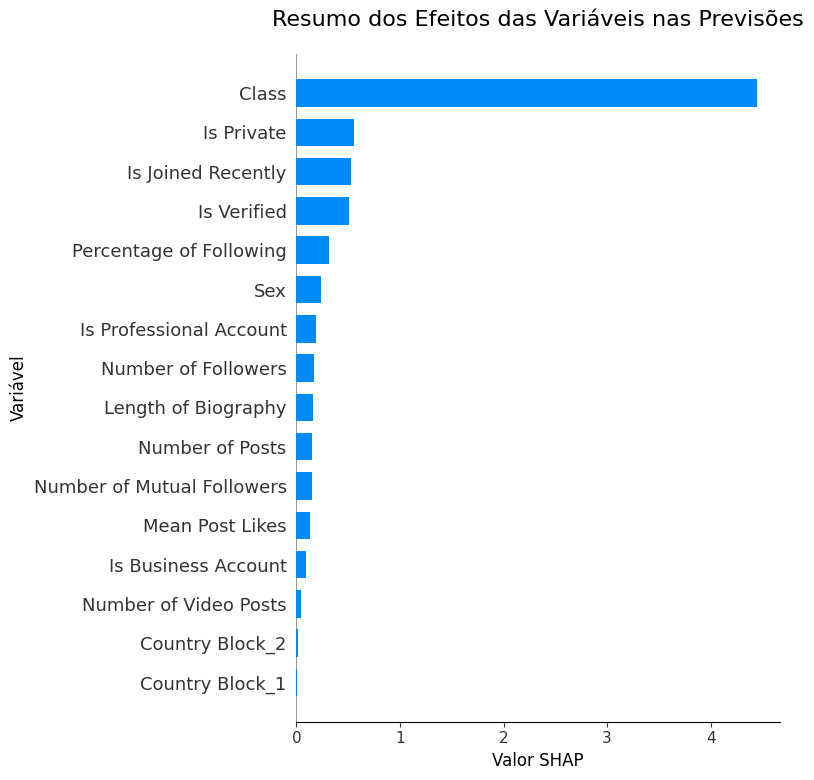

Top 3 variáveis mais influentes: ['Class', 'Percentage of Following', 'Number of Posts']


In [200]:
# Plotar o resumo dos efeitos das variáveis
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('Resumo dos Efeitos das Variáveis nas Previsões', fontsize=16, pad=20)  # Adicionando título
plt.xlabel('Valor SHAP', fontsize=12)  # Adicionando rótulo do eixo x
plt.ylabel('Variável', fontsize=12)  # Adicionando rótulo do eixo y
plt.tight_layout()  # Ajustando o layout para evitar sobreposição de texto
plt.show()

# Identificar as top 3 variáveis mais influentes
top_3_variables = feature_importance.head(3).index.tolist()
print("Top 3 variáveis mais influentes:", top_3_variables)


## **Exrecício 4:**
4) Devido a uma nova norma europeia que prevê altas penalizações para empresas onde exista alguma tipo de discriminação sobre algum setor social ou grupo, o departamento de ética pede-lhe para verificar se os dados ou modelo são tendenciosos relativamente a homens e mulheres. Esta verificação é bastante importante visto que novas estratégias de Marketing Digital estão a ser criadas e é necessário garantir que tanto homens ou mulheres são tratados de maneira igualitária. Atendendo aos dados de treino (training_data.csv), pf indique se existe ou não algum tipo de comportamento tendencioso do modelo ou se os dados são tendenciosos. Pf justifique.

In [223]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import shap
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv('training_data.csv')


In [220]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Length of Username          10000 non-null  float64
 1   Class                       10000 non-null  float64
 2   Sex                         10000 non-null  object 
 3   Is Professional Account     10000 non-null  float64
 4   Country Block_1             10000 non-null  float64
 5   Country Block_2             10000 non-null  float64
 6   Number of Followers         10000 non-null  float64
 7   Is Joined Recently          10000 non-null  float64
 8   Is Private                  10000 non-null  float64
 9   Is Verified                 10000 non-null  float64
 10  Number of Posts             10000 non-null  float64
 11  Number of Mutual Followers  10000 non-null  float64
 12  Mean Post Likes             10000 non-null  float64
 13  Percentage of Following     1000

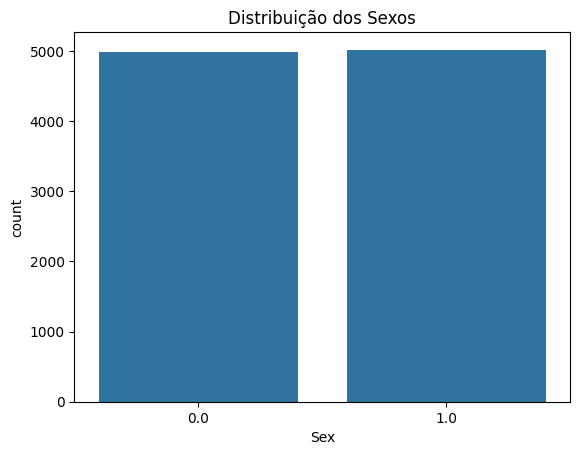

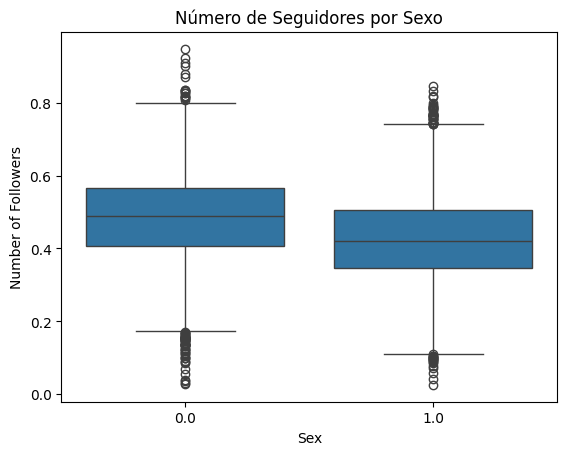

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar a distribuição das características em relação aos sexos
sns.countplot(x='Sex', data=data)
plt.title('Distribuição dos Sexos')
plt.show()

# Analisar outras características em relação aos sexos
# Exemplo:
sns.boxplot(x='Sex', y='Number of Followers', data=data)
plt.title('Número de Seguidores por Sexo')
plt.show()


In [227]:
from scipy import stats

#from scipy import stats

# Realizar testes de hipóteses para avaliar diferenças entre os sexos
male_followers = data[data['Sex'] == 0]['Number of Followers']
female_followers = data[data['Sex'] == 1]['Number of Followers']
t_stat, p_value = stats.ttest_ind(male_followers, female_followers, nan_policy='omit')

# Verificar o resultado do teste
print("Resultado do Teste de Hipóteses (Número de Seguidores):")
print("Estatística de Teste (t):", t_stat)
print("Valor p:", p_value)


Resultado do Teste de Hipóteses (Número de Seguidores):
Estatística de Teste (t): 23.04376488080916
Valor p: 1.5819520078934147e-114


O resultado do teste de hipóteses acima, indica que há uma diferença estatisticamente significativa no número de seguidores entre homens e mulheres. A estatística de teste (t) é de aproximadamente 23.04 e o valor p é extremamente baixo (aproximadamente 1.58e-114), o que sugere fortemente que essa diferença não é devida ao acaso.

Em termos práticos, isso significa que há uma diferença significativa no número médio de seguidores entre homens e mulheres na amostra analisada.

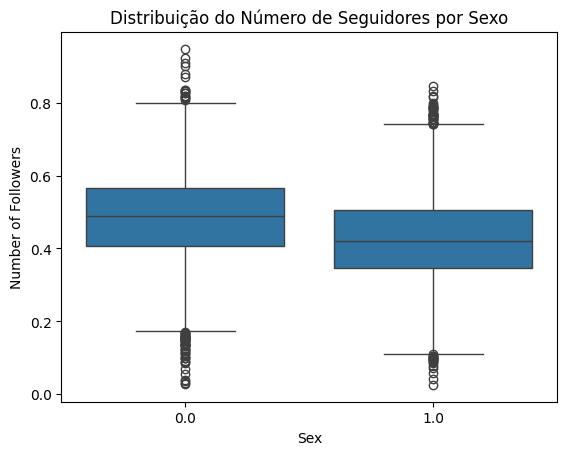

In [234]:
# Visualizar a distribuição das características em relação aos sexos
sns.boxplot(x='Sex', y='Number of Followers', data=data)
plt.title('Distribuição do Número de Seguidores por Sexo')
plt.savefig('boxplot_sexo_numero_seguidores.png')
plt.show()


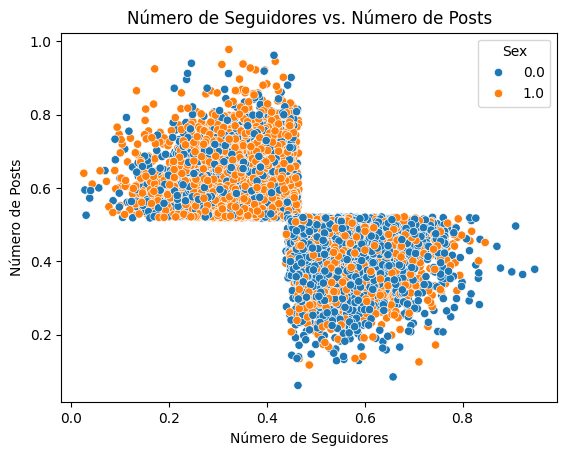

In [235]:
# Visualizar a distribuição das características em relação aos sexos usando um gráfico de dispersão
sns.scatterplot(x='Number of Followers', y='Number of Posts', hue='Sex', data=data)
plt.title('Número de Seguidores vs. Número de Posts')
plt.xlabel('Número de Seguidores')
plt.ylabel('Número de Posts')
plt.savefig('scatterplot_numero_seguidores_vs_numero_posts.png')
plt.show()

